In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


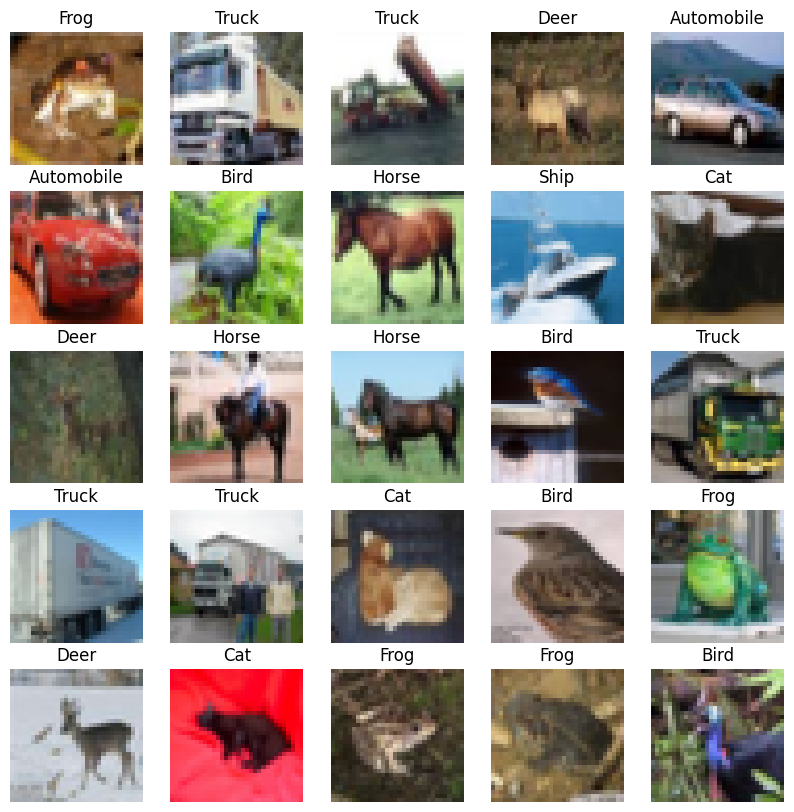

In [ ]:
# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display 25 images in a 5x5 grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')

plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_img = Input(shape=(32, 32, 3))

# Build the layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

# Create the model
model = Model(input_img, output)

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,  # You can adjust the number of epochs
                    batch_size=64,
                    validation_split=0.1,
                    shuffle=True)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8038 - loss: 0.5615 - val_accuracy: 0.7754 - val_loss: 0.6566
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8152 - loss: 0.5240 - val_accuracy: 0.7710 - val_loss: 0.6938
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8267 - loss: 0.4807 - val_accuracy: 0.7646 - val_loss: 0.7169
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8375 - loss: 0.4578 - val_accuracy: 0.7816 - val_loss: 0.6590
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8507 - loss: 0.4164 - val_accuracy: 0.7836 - val_loss: 0.6574
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8624 - loss: 0.3865 - val_accuracy: 0.7706 - val_loss: 0.7279
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8634 - loss: 0.3779 - val_accuracy: 0.7860 - val_loss: 0.6764
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8768 - loss: 0.3472 - val_accuracy: 0.

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 2s - 5ms/step - accuracy: 0.7664 - loss: 0.8719
Test accuracy: 0.7664


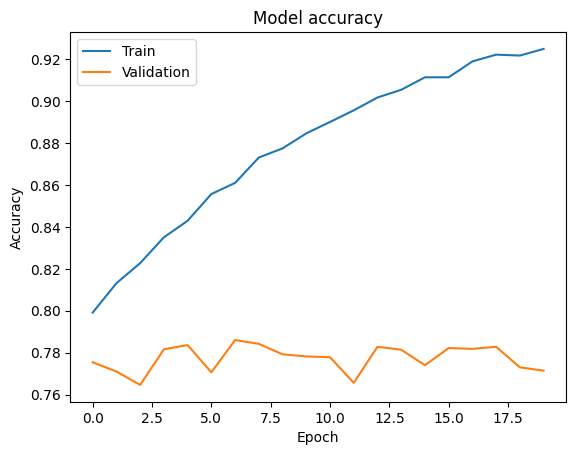

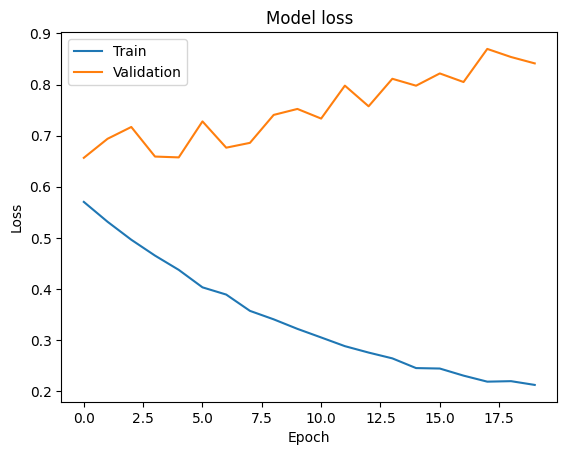

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 2 is correctly classified as Ship.


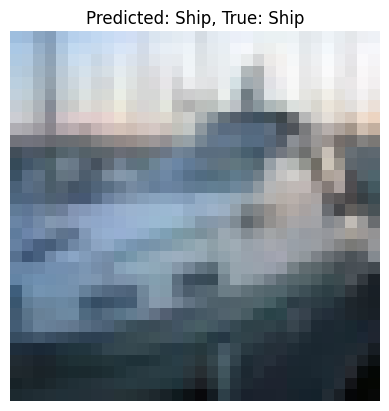

In [15]:
# Choose an image (e.g., the second image in the test set)
image_index = 2
image = x_test[image_index:image_index + 1]  # Get a batch with one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {class_names[predicted_label[0]]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index])  # No 'cmap' argument needed for RGB images
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image 25 is correctly classified as Bird.


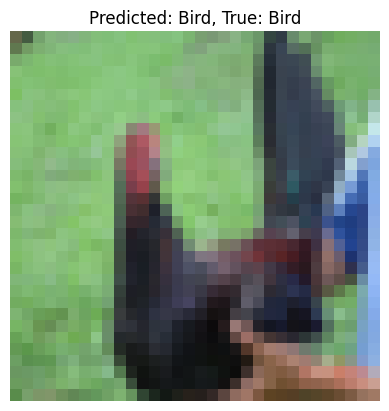

In [16]:
# Choose an image (e.g., the second image in the test set)
image_index = 25
image = x_test[image_index:image_index + 1]  # Get a batch with one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {class_names[predicted_label[0]]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index])  # No 'cmap' argument needed for RGB images
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 200 is correctly classified as Dog.


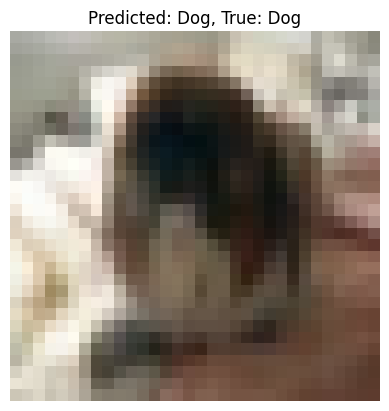

In [17]:
# Choose an image (e.g., the second image in the test set)
image_index = 200
image = x_test[image_index:image_index + 1]  # Get a batch with one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {class_names[predicted_label[0]]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index])  # No 'cmap' argument needed for RGB images
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()